In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset from a local file
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Display the first few rows to check if the dataset is loaded correctly
print(df.head())

   passengerId  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Check for missing values in the dataset
print("Missing values in the data:")
print(df.isnull().sum())

Missing values in the data:
passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibSp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [5]:
# Fill missing values in the 'age' column with the median value
df['age'] = df['age'].fillna(df['age'].median())

In [6]:
# Fill missing values in the 'embarked' column with the most frequent value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [7]:
# Drop the 'cabin' column as it has too many missing values
df.drop(['cabin'], axis=1, inplace=True)


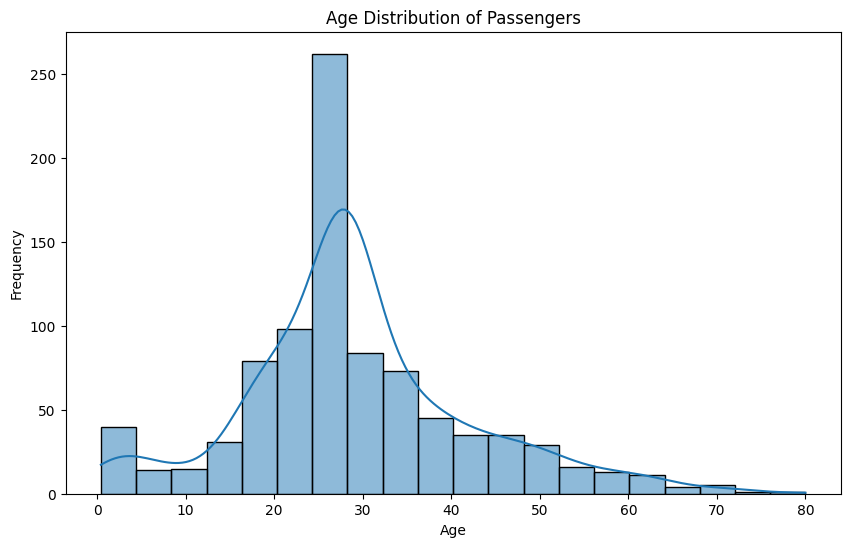

In [8]:
# Plot the age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the age distribution of passengers. It can be seen that most of the passengers are between the ages of 20 and 40.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


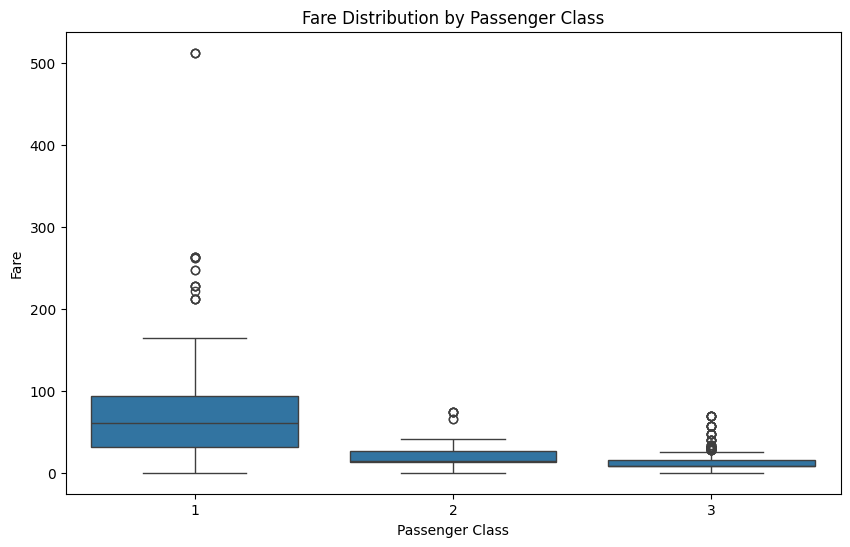

In [9]:
# Box plot to visualize fare distribution by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

The cost of tickets varies greatly, most passengers have paid less than 50 units.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


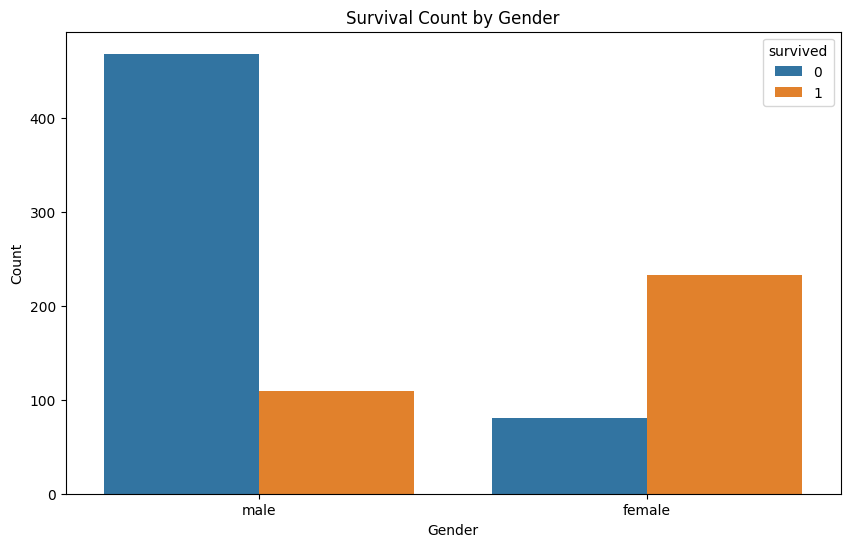

In [13]:
# Bar chart of survival counts by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar chart visualizes the survival counts separated by gender. It highlights the higher survival rate for females compared to males.

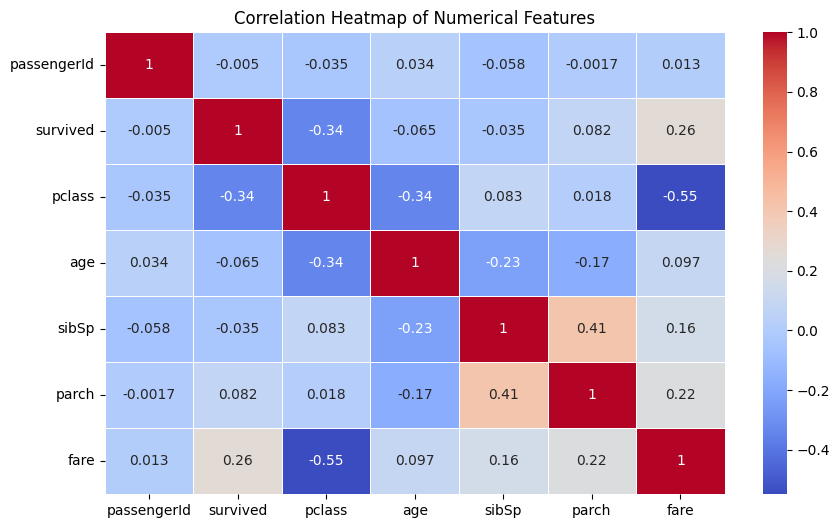

In [14]:
# Filter numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The correlation matrix shows the relationship between numeric variables. It can be seen that 'fare' and 'pclass' are practically uncorrelated, while 'parch' and 'sibSp' have a weak positive correlation.

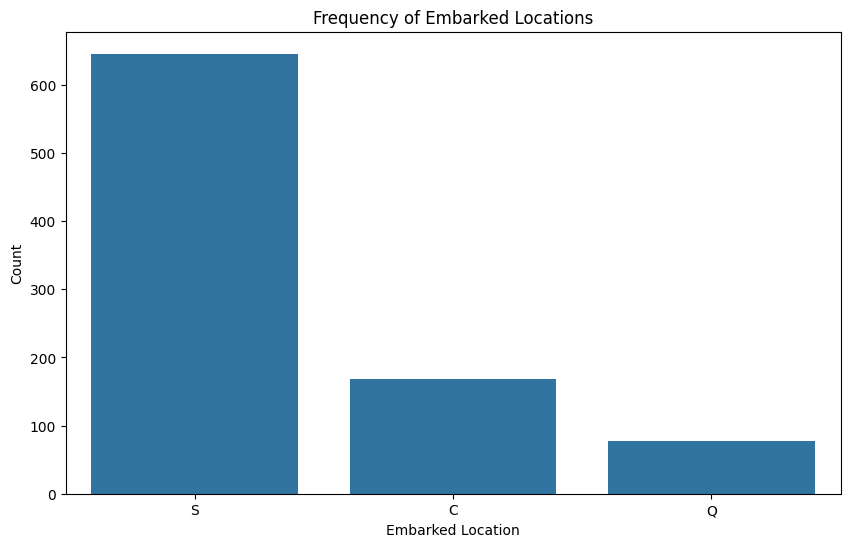

In [15]:
# Bar plot of embarked location frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', data=df)
plt.title('Frequency of Embarked Locations')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of passengers across the embarkation points (Cherbourg, Queenstown, Southampton).